In [8]:
include("pro_mixo_calc.jl")

In [10]:
rawinput = CSV.read("Input/pro_mixo_input.csv", DataFrame)
input_Med = filter(:Site => x -> x == "Med", rawinput)
input_EqPac = filter(:Site => x -> x == "EqPac", rawinput)
input_HOT55 = filter(:Site => x -> x == "HOT55", rawinput)

hourlyPAR = CSV.read("Input/hourly_PAR.csv", DataFrame)
hPARfrac_EqPac = hourlyPAR.Eq_Pac
hPARfrac_HOT55 = hourlyPAR.HOT_Jul

summ_Eq = output_summary(input_EqPac, hPARfrac_EqPac)
summ_HOT = output_summary(input_HOT55, hPARfrac_HOT55)
nothing

In [7]:
using CairoMakie, LaTeXStrings
using Makie.GeometryBasics

In [5]:
function get_points(low, high, depth)
    pts = Point2f[]
    for i in 1:length(depth)
        pt = (low[i], depth[i])
        push!(pts,pt)
    end
    for i in length(depth):-1:1
        pt = (high[i], depth[i])
        push!(pts,pt)
    end
    return pts
end

get_points (generic function with 1 method)

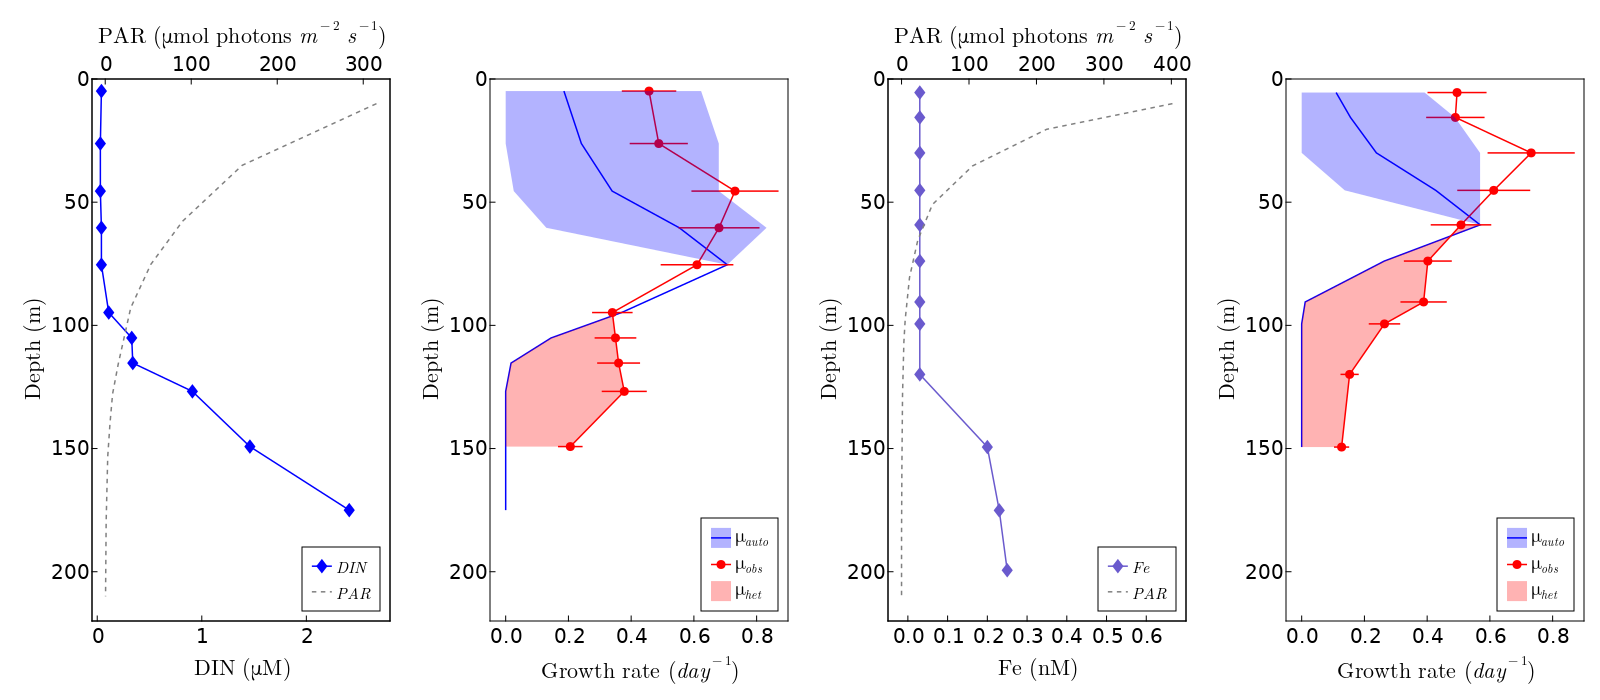

In [9]:
fig = Figure(resolution = (1600,700))
ax1 = Axis(fig[1,1], xlabel = LaTeXString("DIN (μM)"), ylabel = LaTeXString("Depth (m)"), yreversed = true, xlabelsize = 22, ylabelsize = 22)
tw1 = Axis(fig[1,1], xaxisposition = :top, xlabel = LaTeXString("PAR (μmol photons \$m^{-2}\$ \$s^{-1}\$)"), yreversed = true, xlabelsize = 22, ylabelsize = 22)
ax2 = Axis(fig[1,2], xlabel = LaTeXString("Growth rate (\$day^{-1}\$)"), ylabel = LaTeXString("Depth (m)"), yreversed = true, xlabelsize = 22, ylabelsize = 22)
ax3 = Axis(fig[1,3], xlabel = LaTeXString("Fe (nM)"), ylabel = LaTeXString("Depth (m)"), yreversed = true, xlabelsize = 22, ylabelsize = 22)
tw2 = Axis(fig[1,3], xaxisposition = :top, xlabel = LaTeXString("PAR (μmol photons \$m^{-2}\$ \$s^{-1}\$)"), yreversed = true, xlabelsize = 22, ylabelsize = 18)
ax4 = Axis(fig[1,4], xlabel = LaTeXString("Growth rate (\$day^{-1}\$)"), ylabel = LaTeXString("Depth (m)"), yreversed = true, xlabelsize = 22, ylabelsize = 22)

axs = [ax1, ax2, ax3, ax4]
tws = [tw1, tw2]

for ax in axs
    hidedecorations!(ax, ticks = false, label = false, ticklabels = false, minorticks = false)
end
hidexdecorations!(tw1, ticks = false, label = false, ticklabels = false)
hideydecorations!(tw1)
hidexdecorations!(tw2, ticks = false, label = false, ticklabels = false)
hideydecorations!(tw2)

# ax1 & ax3
ln1 = lines!(ax1, input_HOT55.DIN, input_HOT55.Depth, color = :blue)
sc1 = scatter!(ax1, input_HOT55.DIN, input_HOT55.Depth, color = :blue, marker = '♦', markersize = 20)
ln2 = lines!(tw1, input_HOT55.PARav, input_HOT55.Depth, color = :grey, linestyle = :dash)

axislegend(ax1, [[ln1,sc1], ln2], [L"DIN", L"PAR"], position = :rb)

ln3 = lines!(ax3, input_EqPac.Fe_d, input_EqPac.Depth, color = :slateblue)
sc2 = scatter!(ax3, input_EqPac.Fe_d, input_EqPac.Depth, color = :slateblue, marker = '♦', markersize = 20)
ln4 = lines!(tw2, input_EqPac.PARav, input_EqPac.Depth, color = :grey, linestyle = :dash)

axislegend(ax3, [[ln3,sc2], ln4], [L"Fe", L"PAR"], position = :rb)

limits!(ax1, -0.05, 2.8, 220, 0)
limits!(ax3, -0.05, 0.7, 220, 0)

# ax2 & ax4
ln5 = lines!(ax2, summ_HOT[:,1,2], input_HOT55.Depth, color = :blue)
ln6 = lines!(ax2, input_HOT55.Pro_mu, input_HOT55.Depth, color = :red)
errorbars!(ax2, input_HOT55.Pro_mu, input_HOT55.Depth, input_HOT55.Pro_mu .* 0.19, input_HOT55.Pro_mu .* 0.19, direction = :x, color = :red)
sc3 = scatter!(ax2, input_HOT55.Pro_mu, input_HOT55.Depth, color = :red)

ln7 = lines!(ax4, summ_Eq[:,1,2], input_EqPac.Depth, color = :blue)
ln8 = lines!(ax4, input_EqPac.Pro_mu, input_EqPac.Depth, color = :red)
errorbars!(ax4, input_EqPac.Pro_mu, input_EqPac.Depth, input_EqPac.Pro_mu .* 0.19, input_EqPac.Pro_mu .* 0.19, direction = :x, color = :red)
sc4 = scatter!(ax4, input_EqPac.Pro_mu, input_EqPac.Depth, color = :red)

limits!(ax2, -0.05, 0.9, 220, 0)
limits!(ax4, -0.05, 0.9, 220, 0)

poly1 = poly!(ax2, get_points(summ_HOT[1:5,2,2], summ_HOT[1:5,3,2], input_HOT55.Depth[1:5]), color = (:blue, 0.3))
poly2 = poly!(ax2, get_points(summ_HOT[6:10,1,2], input_HOT55.Pro_mu[6:10], input_HOT55.Depth[6:10]), color = (:red, 0.3))

poly3 = poly!(ax4, get_points(summ_Eq[1:5,2,2], summ_Eq[1:5,3,2], input_EqPac.Depth[1:5]), color = (:blue, 0.3))
poly4 = poly!(ax4, get_points(summ_Eq[5:10,1,2], input_EqPac.Pro_mu[5:10], input_EqPac.Depth[5:10]), color = (:red, 0.3))

axislegend(ax2, [[ln5,poly1], [ln6,sc3], poly2], [L"μ_{auto}", L"μ_{obs}", L"μ_{het}"], position = :rb, labelsize = 20)

axislegend(ax4, [[ln7,poly3], [ln8,sc4], poly4], [L"μ_{auto}", L"μ_{obs}", L"μ_{het}"], position = :rb, labelsize = 20)

for ax in axs
    ax.xticklabelsize = 20
    ax.yticklabelsize = 20
    ax.xtickalign = 1
    ax.ytickalign = 1
end
for tw in tws
    tw.xticklabelsize = 20
    tw.yticklabelsize = 20
    tw.xtickalign = 1
    tw.ytickalign = 1
end

fig